In [54]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

# Reading data for 3 resolutions

In [55]:
res=[1,2,3]
step=10
datam=[]
databeta=[]
datapsi=[]
dataderpsi=[]
datagrid=[]

for resolution in res:
    dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res{}".format(resolution)

    print(dir)
    
    count=0
    for path in os.listdir(dir):
        # check if current path is a file
        if os.path.isfile(os.path.join(dir, path)):
            count += 1
    print('File count in dir', dir, 'is: ', count)


    m=[]
    beta=[]
    psi=[]
    derpsi=[]
    grid=[]
    
    #iterate over files in dir
    for i in range(count):
        with pd.option_context('display.precision', 20):
            df = pd.read_csv(dir + "/time_step{}.csv".format(i*step), header=None, dtype = str)
        df = df.to_numpy()
        df = np.transpose(df)
        #print(type(df[0]))
        aux = [float(x) for x in df[0]]
        m.append(aux)
        aux = [float(x) for x in df[1]]
        beta.append(aux)
        aux = [float(x) for x in df[2]]
        psi.append(aux)
        aux = [float(x) for x in df[3]]
        derpsi.append(aux)
        aux = [float(x) for x in df[4]]
        grid.append(aux)

    # f[i] is the array of the values of m on the whole grid on time step i
    
    
    datam.append(m)
    databeta.append(beta)
    datapsi.append(psi)
    dataderpsi.append(derpsi)
    datagrid.append(grid)

/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1
File count in dir /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1 is:  21
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res2
File count in dir /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res2 is:  41
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res3
File count in dir /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res3 is:  81


In [56]:
final_t=count
print(count)

81


In [57]:
print(datam[0][0][1]) # datam indexes give res, time then gridpoint

-4.925839291085261e-11


In [58]:
L=len(datam[0][0])-6 # grid length without the ghostpoints
dx=datagrid[0][0][1]-datagrid[0][0][0]

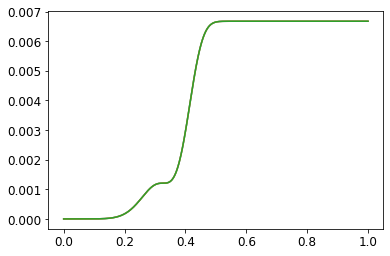

In [59]:
plt_x1 = np.linspace(0, 1, L)
plt_x2 = np.linspace(0, 1, 2*L-1)
plt_x3 = np.linspace(0, 1, 4*L-3)

plt.plot(plt_x1,datam[0][0][3:len(datam[0][0])-3])
plt.plot(plt_x2,datam[1][0][3:len(datam[1][0])-3])
plt.plot(plt_x3,datam[2][0][3:len(datam[2][0])-3])

# Styling plots

In [60]:
plt.rcParams.update({'font.size': 12})

# Plotting data with resolutions 1 and 2 and differences 

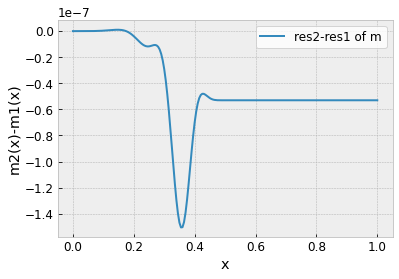

In [61]:
# for given t
t1=3 #last timestep
t2=2*t1
t3=4*t1
auxm = []
auxbeta = []
auxpsi = []
auxderpsi = []
auxgrid = []

for i in range(len(datam[1][t2])):#iterate on the grid with higher resolution
    if ((i>2) and (i < (len(datam[1][t2])-3)) and ((i%2)!=0)): #ignoring ghost points
        auxm.append(datam[1][t2][i])
        auxbeta.append(databeta[1][t2][i])
        auxpsi.append(datapsi[1][t2][i])
        auxderpsi.append(dataderpsi[1][t2][i])
        auxgrid.append(datagrid[1][t2][i])
        #print(datam[1][0][i])

        
# array for all diff_m_2_1 diff_beta_2_1 diff_psi_2_1 diff_derpsi_2_1
diffs_2_1 = []

#subtracting f in both resolutions & ignoring ghost points
diffs_2_1.append(np.subtract(datam[0][t1][3:len(datam[0][t1])-3],auxm))
diffs_2_1.append(np.subtract(databeta[0][t1][3:len(databeta[0][t1])-3],auxbeta))
diffs_2_1.append(np.subtract(datapsi[0][t1][3:len(datapsi[0][t1])-3],auxpsi))
diffs_2_1.append(np.subtract(dataderpsi[0][t1][3:len(dataderpsi[0][t1])-3],auxderpsi))
diffs_2_1.append(np.subtract(datagrid[0][t1][3:len(datagrid[0][t1])-3],auxgrid))

with plt.style.context('bmh'):
    plt.plot(plt_x1, diffs_2_1[0], label = 'res2-res1 of m')

plt.legend()
plt.xlabel('x')
plt.ylabel('m2(x)-m1(x)')
plt.show()

Resolution 4

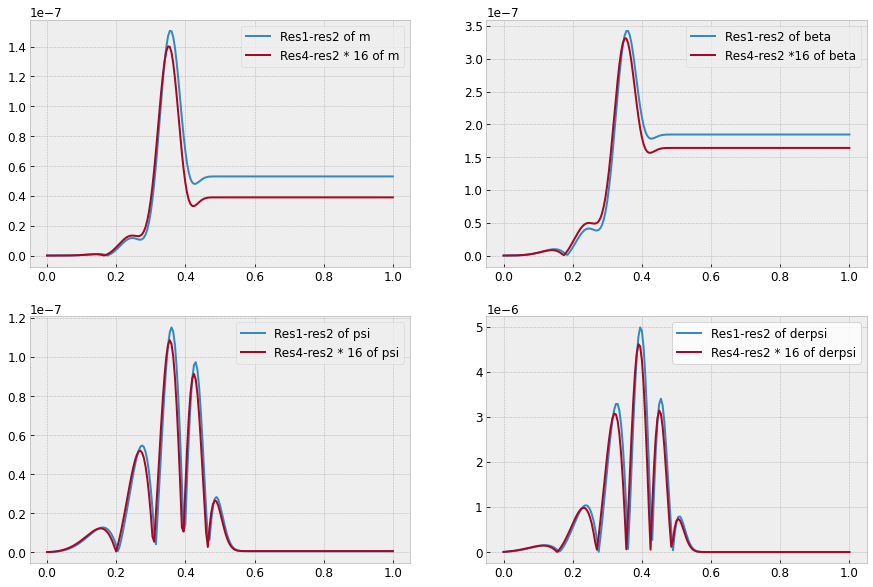

In [62]:
# for given t

aux2m = []
aux2beta = []
aux2psi = []
aux2derpsi = []
aux2grid = []
for i in range(len(datam[2][t3])):#iterate on the grid with higher resolution
    if ((i>2) and (i < (len(datam[2][t3])-3)) and (((i+1)%4)==0)): #ignoring ghost points
        aux2m.append(datam[2][t3][i])
        aux2beta.append(databeta[2][t3][i])
        aux2psi.append(datapsi[2][t3][i])
        aux2derpsi.append(dataderpsi[2][t3][i])
        aux2grid.append(datagrid[2][t3][i])
        


#subtracting m beta psi and derpsi in both resolutions & ignoring ghost points
diffs_4_2 =[]
diffs_4_2.append(np.subtract(auxm,aux2m))
diffs_4_2.append(np.subtract(auxbeta,aux2beta))
diffs_4_2.append(np.subtract(auxpsi,aux2psi))
diffs_4_2.append(np.subtract(auxderpsi,aux2derpsi))
diffs_4_2.append(np.subtract(auxgrid,aux2grid))

with plt.style.context('bmh'):
    
    fig, ax = plt.subplots(2, 2,figsize=(15, 10))

    ax[0][0].plot(plt_x1, abs(diffs_2_1[0]), label='Res1-res2 of m')
    ax[0][0].plot(plt_x1, abs(diffs_4_2[0])*16, label='Res4-res2 * 16 of m')
    ax[0][0].legend()
    
    ax[0][1].plot(plt_x1, abs(diffs_2_1[1]), label='Res1-res2 of beta')
    ax[0][1].plot(plt_x1, abs(diffs_4_2[1])*16, label='Res4-res2 *16 of beta')
    ax[0][1].legend()
    
    ax[1][0].plot(plt_x1, abs(diffs_2_1[2]), label='Res1-res2 of psi')
    ax[1][0].plot(plt_x1, abs(diffs_4_2[2])*16, label='Res4-res2 * 16 of psi')
    ax[1][0].legend()
    
    """ax[1][1].plot(plt_x1, abs(diffs_2_1[3]), label='Res1-res2 of derpsi')
    ax[1][1].plot(plt_x1, abs(diffs_4_2[3])*16, label='Res4-res2 * 16 of derpsi')
    #ax[1][1].set_xlim([20, 22])#4.90,5
    #ax[1][1].set_ylim([0, 0.5*10**(-9)])
    ax[1][1].legend()"""

    ax[1][1].plot(plt_x1, abs(diffs_2_1[3]), label='Res1-res2 of derpsi')
    ax[1][1].plot(plt_x1, abs(diffs_4_2[3])*16, label='Res4-res2 * 16 of derpsi')
    #ax[1][1].set_xlim([20, 22])#4.90,5
    #ax[1][1].set_ylim([0, 0.5*10**(-9)])
    ax[1][1].legend()

plt.legend()
plt.show()



# Pointwise convergence tests: plots for thesis project report 

# L2 norm convergence tests

In [63]:
#for the first time step

norm_low_med = []
norm_med_high = []

for j in range(5):
    a = 0
    b = 0
    for i in diffs_2_1[j]:
        a += i**2
    for i in diffs_4_2[j]:
        b += i**2
    norm_low_med.append(np.sqrt(a))
    norm_med_high.append(np.sqrt(b))

print("m convergence factor:")
print(math.log2(norm_low_med[0]/norm_med_high[0]))
print("")

print("beta convergence factor:")
print(math.log2(norm_low_med[1]/norm_med_high[1]))
print("")

print("psi convergence factor:")
print(math.log2(norm_low_med[2]/norm_med_high[2]))
print("")

print("derpsi convergence factor:")
print(math.log2(norm_low_med[3]/norm_med_high[3]))
print("")


m convergence factor:
4.279153208881112

beta convergence factor:
4.129576970781917

psi convergence factor:
4.076540437313499

derpsi convergence factor:
4.097429627556979



# Q(t)

In [65]:
Q_m = []
Q_beta = []
Q_psi = []
Q_derpsi = []

for t in range(0,int(final_t/4)):
    # for given t
    t1=t #last timestep
    t2=2*t1
    t3=4*t1
    auxm = []
    auxbeta = []
    auxpsi = []
    auxderpsi = []

    for i in range(len(datam[1][t2])):#iterate on the grid with higher resolution
        if ((i>2) and (i < (len(datam[1][t2])-3)) and ((i%2)!=0)): #ignoring ghost points
            auxm.append(datam[1][t2][i])
            auxbeta.append(databeta[1][t2][i])
            auxpsi.append(datapsi[1][t2][i])
            auxderpsi.append(dataderpsi[1][t2][i])
            #print(datam[1][0][i])


    # array for all diff_m_2_1 diff_beta_2_1 diff_psi_2_1 diff_derpsi_2_1
    diffs_2_1 = []

    #subtracting f in both resolutions & ignoring ghost points
    diffs_2_1.append(np.subtract(datam[0][t1][3:len(datam[0][t1])-3],auxm))
    diffs_2_1.append(np.subtract(databeta[0][t1][3:len(databeta[0][t1])-3],auxbeta))
    diffs_2_1.append(np.subtract(datapsi[0][t1][3:len(datapsi[0][t1])-3],auxpsi))
    diffs_2_1.append(np.subtract(dataderpsi[0][t1][3:len(dataderpsi[0][t1])-3],auxderpsi))

    # for given t

    aux2m = []
    aux2beta = []
    aux2psi = []
    aux2derpsi = []
    for i in range(len(datam[2][t3])):#iterate on the grid with higher resolution
        if ((i>2) and (i < (len(datam[2][t3])-3)) and (((i+1)%4)==0)): #ignoring ghost points
            aux2m.append(datam[2][t3][i])
            aux2beta.append(databeta[2][t3][i])
            aux2psi.append(datapsi[2][t3][i])
            aux2derpsi.append(dataderpsi[2][t3][i])



    #subtracting m beta psi and derpsi in both resolutions & ignoring ghost points
    diffs_4_2 =[]
    diffs_4_2.append(np.subtract(auxm,aux2m))
    diffs_4_2.append(np.subtract(auxbeta,aux2beta))
    diffs_4_2.append(np.subtract(auxpsi,aux2psi))
    diffs_4_2.append(np.subtract(auxderpsi,aux2derpsi))


    ####

    norm_low_med = []
    norm_med_high = []

    for j in range(4):
        a = 0
        b = 0
        for i in diffs_2_1[j]:
            a += i**2
        for i in diffs_4_2[j]:
            b += i**2
        norm_low_med.append(np.sqrt(a))
        norm_med_high.append(np.sqrt(b))

    Q_m.append(math.log2(norm_low_med[0]/norm_med_high[0]))
    Q_beta.append(math.log2(norm_low_med[1]/norm_med_high[1]))
    Q_psi.append(math.log2(norm_low_med[2]/norm_med_high[2]))
    Q_derpsi.append(math.log2(norm_low_med[3]/norm_med_high[3]))

/tmp/ipykernel_5545/1538885732.py:74: RuntimeWarning: invalid value encountered in double_scalars
  Q_psi.append(math.log2(norm_low_med[2]/norm_med_high[2]))
/tmp/ipykernel_5545/1538885732.py:75: RuntimeWarning: invalid value encountered in double_scalars
  Q_derpsi.append(math.log2(norm_low_med[3]/norm_med_high[3]))


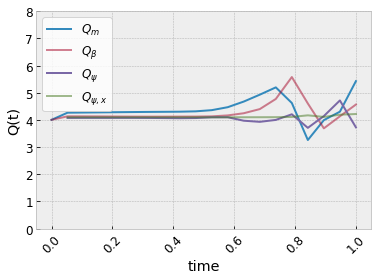

In [67]:
#plt_x = range(0,int(final_t/4))
plt_x = np.linspace(0, int(final_t/4)*dx*step, int(final_t/4))

with plt.style.context('bmh'):
    plt.plot(plt_x, Q_m, label = '$Q_m$')
    plt.plot(plt_x, Q_beta, label = '$Q_{\\beta}$',alpha=0.5)
    plt.plot(plt_x, Q_psi, label = '$Q_{\psi}$')
    plt.plot(plt_x, Q_derpsi, label = '$Q_{\psi,x}$',alpha=0.5)
    

plt.ylim([0, 8])

plt.legend(loc ="upper left")
plt.xticks(rotation=45)
plt.xlabel('time')
plt.ylabel('Q(t)')
plt.show()

In [119]:
"""hres_x=plt_x
hres_y1=Q_m
hres_y2=Q_beta
hres_y3=Q_psi
hres_y4=Q_derpsi"""

'hres_x=plt_x\nhres_y1=Q_m\nhres_y2=Q_beta\nhres_y3=Q_psi\nhres_y4=Q_derpsi'

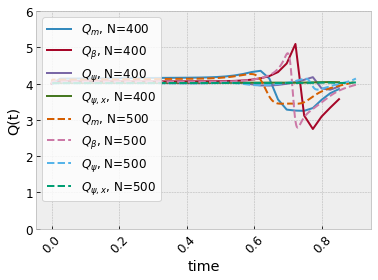

In [122]:
"""with plt.style.context('bmh'):
    plt.plot(plt_x, Q_m, label = '$Q_m$, N=400')
    plt.plot(plt_x, Q_beta, label = '$Q_{\\beta}$, N=400')
    plt.plot(plt_x, Q_psi, label = '$Q_{\psi}$, N=400')
    plt.plot(plt_x, Q_derpsi, label = '$Q_{\psi,x}$, N=400')
    
    plt.plot(hres_x, hres_y1, label = '$Q_m$, N=500',linestyle='dashed')
    plt.plot(hres_x, hres_y2, label = '$Q_{\\beta}$, N=500',linestyle='dashed')
    plt.plot(hres_x, hres_y3, label = '$Q_{\psi}$, N=500',linestyle='dashed')
    plt.plot(hres_x, hres_y4, label = '$Q_{\psi,x}$, N=500',linestyle='dashed')

plt.ylim([0, 6])

plt.legend(loc ="upper left")
plt.xticks(rotation=45)
plt.xlabel('time')
plt.ylabel('Q(t)')
plt.show()"""

# Evolving grid

In [23]:
len(datagrid[0][0])

507

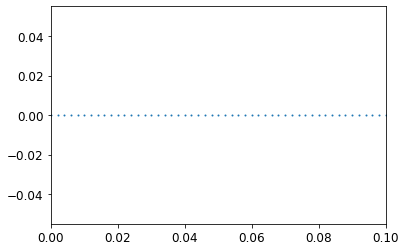

In [24]:
y=np.zeros(len(datagrid[0][0]))

#for i in range(len(datagrid[0][0])):
plt.scatter(datagrid[0][60],y, s=1)
plt.xlim([0,0.1])
plt.show()

In [ ]:
for i in datagrid[0][60]:
    plt.axvline(x = i, color = 'b',linewidth=0.2)
plt.xlim([0.9, 0.91])
plt.show()

for i in datagrid[0][60]:
    plt.axvline(x = i, color = 'b',linewidth=0.2)
plt.xlim([0.0, 0.01])
plt.show()

In [ ]:
datagrid[0][0]